# CAPSTONE PROJECT - THE BATTLE OF NEIGHBORHOODS
#### By Martín Yunis

### Methodology and Data Analysis

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
#import json
from urllib.request import urlopen
from pandas.io.json import json_normalize
%matplotlib inline

Get the GeoJson information of the neighborhoods of Buenos Aires

In [2]:
!wget --quiet http://cdn.buenosaires.gob.ar/datosabiertos/datasets/barrios/barrios.geojson
caba_geo = r'barrios.geojson' # geojson file
print('Buenos Aires GeoJSON file downloaded!')

Buenos Aires GeoJSON file downloaded!


Get the list of neighborhoods and to which commune it belongs. Also the average of m2 in dollars by neighborhood.
We only have intererest in the last 3 years. 

In [3]:
url_sell = 'http://cdn.buenosaires.gob.ar/datosabiertos/datasets/acceso-vivienda-y-mercado-inmobiliario/precio-venta-deptos.csv'
dfpv = pd.read_csv(url_sell)
#Last 3 years
sell_price_filtered = dfpv[dfpv['año'] > 2016]  
#List all Neighborhoods in Buenos Aires
neighborhoods = sell_price_filtered["barrio"].unique()
neighborhoods = pd.DataFrame(neighborhoods)
neighborhoods.rename(columns={0:"Neighborhood"}, inplace=True)
neighborhoods

Neighborhood
0           AGRONOMIA
1             ALMAGRO
2           BALVANERA
3            BARRACAS
4            BELGRANO
5                BOCA
6               BOEDO
7           CABALLITO
8           CHACARITA
9             COGHLAN
10         COLEGIALES
11       CONSTITUCION
12             FLORES
13           FLORESTA
14             PATERL
15            LINIERS
16          MATADEROS
17       MONTE CASTRO
18          MONSERRAT
19      NUEVA POMPEYA
20              NUÑEZ
21            PALERMO
22  PARQUE AVELLANEDA
23   PARQUE CHACABUCO
24        PARQUE CHAS
25   PARQUE PATRICIOS
26      PUERTO MADERO
27           RECOLETA
28             RETIRO
29           SAAVEDRA
30      SAN CRISTOBAL
31        SAN NICOLAS
32          SAN TELMO
33    VELEZ SARSFIELD
34          VERSALLES
35       VILLA CRESPO
36   VILLA DEL PARQUE
37       VILLA DEVOTO
38  VILLA GRAL. MITRE
39       VILLA LUGANO
40         VILLA LURO
41      VILLA ORTUZAR
42   VILLA PUEYRREDON
43         VILLA REAL
44    VILLA RIACHUELO
45   VILLA SANTA RITA
46      VILLA SOLDATI
47      VILLA URQUIZA

Translate to english the names of the columns

In [4]:
sell_price_filtered.rename(columns={"barrio": "Neighborhood", "año": "year", "trimestre": "quarter","precio_prom": "avg_price", "ambientes": "rooms", "estado": "status","comuna": "commune"}, inplace=True)
sell_price_filtered.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Neighborhood  year  quarter  avg_price        rooms status  commune
28    AGRONOMIA  2017        1     2140.0  2 ambientes  Usado       15
29    AGRONOMIA  2017        2     2203.0  2 ambientes  Usado       15
30    AGRONOMIA  2017        3     2303.0  2 ambientes  Usado       15
31    AGRONOMIA  2017        4        NaN  2 ambientes  Usado       15
32    AGRONOMIA  2018        1        NaN  2 ambientes  Usado       15

More data wrangling and cleaning the rows with Nan values

In [5]:
sell_price_filtered["rooms"].replace('ambientes','', regex=True, inplace=True)
sell_price_filtered["status"].replace('Usado','Used', regex=True, inplace=True)
sell_price_filtered["status"].replace('A estrer','New', regex=True, inplace=True)
sell_price_filtered = sell_price_filtered.dropna()
sell_price_filtered

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Neighborhood  year  quarter  avg_price rooms status  commune
28            AGRONOMIA  2017        1     2140.0    2    Used       15
29            AGRONOMIA  2017        2     2203.0    2    Used       15
30            AGRONOMIA  2017        3     2303.0    2    Used       15
66              ALMAGRO  2017        1     2282.0    2    Used        5
67              ALMAGRO  2017        2     2290.0    2    Used        5
68              ALMAGRO  2017        3     2386.0    2    Used        5
69              ALMAGRO  2017        4     2468.0    2    Used        5
70              ALMAGRO  2018        1     2680.0    2    Used        5
71              ALMAGRO  2018        2     2755.0    2    Used        5
72              ALMAGRO  2018        3     2756.0    2    Used        5
73              ALMAGRO  2018        4     2730.0    2    Used        5
74              ALMAGRO  2019        1     2695.0    2    Used        5
75              ALMAGRO  2019        2     2640.0    2    Used        5
104           BALVANERA  2017        1     1972.0    2    Used        3
105           BALVANERA  2017        2     1985.0    2    Used        3
106           BALVANERA  2017        3     2003.0    2    Used        3
107           BALVANERA  2017        4     2149.0    2    Used        3
108           BALVANERA  2018        1     2197.0    2    Used        3
109           BALVANERA  2018        2     2319.0    2    Used        3
110           BALVANERA  2018        3     2291.0    2    Used        3
111           BALVANERA  2018        4     2289.0    2    Used        3
112           BALVANERA  2019        1     2245.0    2    Used        3
113           BALVANERA  2019        2     2272.0    2    Used        3
142            BARRACAS  2017        1     2299.0    2    Used        4
143            BARRACAS  2017        2     2130.0    2    Used        4
144            BARRACAS  2017        3     2095.0    2    Used        4
145            BARRACAS  2017        4     2183.0    2    Used        4
146            BARRACAS  2018        1     2370.0    2    Used        4
147            BARRACAS  2018        2     2531.0    2    Used        4
148            BARRACAS  2018        3     2480.0    2    Used        4
...                 ...   ...      ...        ...   ...    ...      ...
6869   VILLA DEL PARQUE  2017        2     2530.0    3     New       11
6906       VILLA DEVOTO  2017        1     2241.0    3     New       11
6907       VILLA DEVOTO  2017        2     2586.0    3     New       11
6908       VILLA DEVOTO  2017        3     2585.0    3     New       11
6912       VILLA DEVOTO  2018        3     2960.0    3     New       11
6913       VILLA DEVOTO  2018        4     3021.0    3     New       11
6944  VILLA GRAL. MITRE  2017        1     2288.0    3     New       11
6950  VILLA GRAL. MITRE  2018        3     2674.0    3     New       11
7020         VILLA LURO  2017        1     2228.0    3     New       10
7021         VILLA LURO  2017        2     2237.0    3     New       10
7022         VILLA LURO  2017        3     2317.0    3     New       10
7023         VILLA LURO  2017        4     2492.0    3     New       10
7024         VILLA LURO  2018        1     2564.0    3     New       10
7025         VILLA LURO  2018        2     2464.0    3     New       10
7026         VILLA LURO  2018        3     2537.0    3     New       10
7027         VILLA LURO  2018        4     2621.0    3     New       10
7028         VILLA LURO  2019        1     2756.0    3     New       10
7029         VILLA LURO  2019        2     2800.0    3     New       10
7210   VILLA SANTA RITA  2017        1     1890.0    3     New       11
7211   VILLA SANTA RITA  2017        2     1975.0    3     New       11
7286      VILLA URQUIZA  2017        1     2790.0    3     New       12
7287      VILLA URQUIZA  2017        2     2890.0    3     New       12
7288      VILLA URQUIZA  2017        3     3007.0    3     New       12
7289      VILLA URQUIZA  2017        4     3116.0  

Let's see which are the best valued neighborhoods in the real estate market.

We will group the information of the average sales per quarter, regardless of whether the apartment is new or not or if it is 2 or 3 rooms. We want to find out what are the 10 neighborhoods where the price of the m2 is higher, which indicates that the purchasing power of the neighborhood is also high.

Since we are trying to sell a differentiated product and that we have our public well targeted, we want to see which neighborhoods meet those conditions.

We are going to group the data and get the average price per neighborhood of the last 3 years. Those are going to be our 10 candidate neighborhoods.

In [6]:
top_ten = sell_price_filtered.groupby(["Neighborhood"],as_index=False).mean().sort_values("avg_price", ascending=False, inplace=False).head(10)
top_ten

Neighborhood         year   quarter    avg_price  commune
25  PUERTO MADERO  2017.761905  2.238095  6030.571429      1.0
26       RECOLETA  2017.800000  2.300000  3751.450000      2.0
19        PALERMO  2017.800000  2.300000  3708.200000     14.0
4        BELGRANO  2017.800000  2.300000  3637.375000     13.0
18          NUÑEZ  2017.833333  2.277778  3515.777778     13.0
10     COLEGIALES  2017.852941  2.264706  3302.294118     13.0
43  VILLA URQUIZA  2017.800000  2.300000  3127.575000     12.0
9         COGHLAN  2017.647059  2.235294  3091.352941     12.0
27         RETIRO  2017.800000  2.300000  3010.300000      1.0
7       CABALLITO  2017.800000  2.300000  2925.300000      6.0

Visualize Top Ten Neighborhoods

<Figure size 432x288 with 0 Axes>

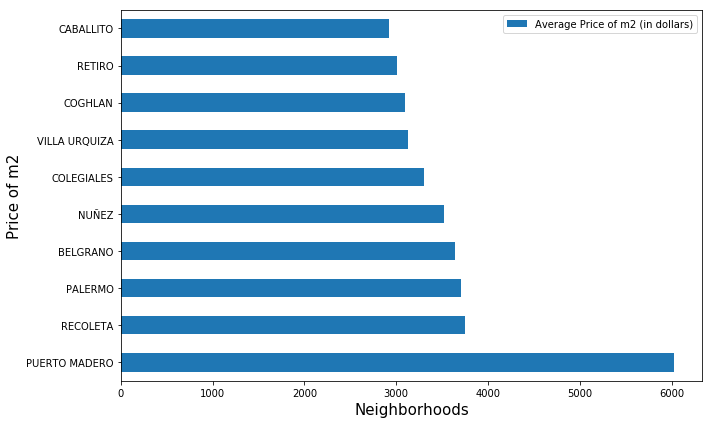

In [9]:
fig = plt.figure()
ax = top_ten.plot(kind='barh', x="Neighborhood", y="avg_price", figsize=(10,6))
ax.legend(["Average Price of m2 (in dollars)"]);
fig = ax.get_figure()
ax.set_ylabel("Price of m2",fontsize = 15)
ax.set_xlabel("Neighborhoods",fontsize = 15)
fig.tight_layout()
fig.savefig("avg_m2.png")

Puerto Madero takes the first place as the most expensive neighborhood to buy in Buenos Aires with $ 6030 dollars per square meter. Recoleta and Palermo are behind with a much lower value. Caballito is the neighborhood with the lowest m2 price.

In [10]:
#Prepare the table to load de lattitude and longitude of each neighborhood
top_ten.drop(columns=["commune"], inplace=True)
top_ten.rename(columns={"year" : "lat","quarter" : "lon"}, inplace=True)
top_ten["lat"] = 0.0
top_ten["lon"] = 0.0
top_ten

Neighborhood  lat  lon    avg_price
25  PUERTO MADERO  0.0  0.0  6030.571429
26       RECOLETA  0.0  0.0  3751.450000
19        PALERMO  0.0  0.0  3708.200000
4        BELGRANO  0.0  0.0  3637.375000
18          NUÑEZ  0.0  0.0  3515.777778
10     COLEGIALES  0.0  0.0  3302.294118
43  VILLA URQUIZA  0.0  0.0  3127.575000
9         COGHLAN  0.0  0.0  3091.352941
27         RETIRO  0.0  0.0  3010.300000
7       CABALLITO  0.0  0.0  2925.300000

In [11]:
from geopy.geocoders import Nominatim

Define a function to obtain the geographic coordinates of an address using the Nominatim service and get the geographic coordinates of each neighborhood.

In [13]:
from geopy.exc import GeocoderTimedOut
str_city = ', Buenos Aires'


def get_location(address):
    try:
        coord = []
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        coord.append(latitude)
        coord.append(longitude)
        return coord
    except GeocoderTimedOut: #Get rid of Nominatim TimeOut
        return get_location(address)


for i, row in top_ten.iterrows():
    address = row[0]+str_city
    res = get_location(address)
    top_ten.at[i, "lat"] = res[0]
    top_ten.at[i, "lon"] = res[1]
    
top_ten

Neighborhood        lat        lon    avg_price
25  PUERTO MADERO -34.610376 -58.362207  6030.571429
26       RECOLETA -34.587358 -58.391570  3751.450000
19        PALERMO -34.580336 -58.424524  3708.200000
4        BELGRANO -34.561308 -58.456545  3637.375000
18          NUÑEZ -34.545348 -58.462149  3515.777778
10     COLEGIALES -34.574515 -58.452282  3302.294118
43  VILLA URQUIZA -34.573241 -58.491478  3127.575000
9         COGHLAN -34.559910 -58.474714  3091.352941
27         RETIRO -34.591643 -58.373307  3010.300000
7       CABALLITO -34.620077 -58.442489  2925.300000

Install and import Folium for the maps we are going to do.

In [15]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium 
print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                       

Look for the coordinates of Buenos Aires and define the city center. Use the price information of the 10 candidates on a choropleth map. Then, add some more information to the map, such as names and define the boundaries of each neighborhood

In [19]:
ba_center = get_location('Buenos Aires')

ba = folium.Map(location=[ba_center[0], ba_center[1]], zoom_start=12)

ba.choropleth(
    geo_data=caba_geo,
    data=top_ten,
    columns=['Neighborhood', 'avg_price'],
    key_on='feature.properties.barrio',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name="Average Price of m2 (in dollars)"
)
# display map
ba.save('ba_map.html')
ba

In [107]:
folium.GeoJson(caba_geo, name='geojson').add_to(ba)
for name, lat, lon in zip(top_ten.Neighborhood, top_ten.lat, top_ten.lon):
    folium.Marker(location=[lat, lon],icon=folium.DivIcon(html=name)).add_to(ba)
ba.save("map.html")
ba

##### We have identified what our target audience is and we also know that bars gets along very well with the cultural activities. That is why we are going to look for libraries, bookshops, film and TV studios, theaters, cultural centers, etc., to find out where we have more possibilities to have customers to consume our craft beer.

We use the information of Cultural Dependencies obtained directly from the datasets provided by the Government of the City of Buenos Aires.

In [59]:
url = "http://cdn.buenosaires.gob.ar/datosabiertos/datasets/dependencias-culturales/dependencias-culturales.csv" 
df_cult = pd.read_csv(url, sep=';')
df_cult.head()

LAT        LNG    ID  \
0 -34.609173 -58.384297   192   
1 -34.596817 -58.383559  1467   
2 -34.609848 -58.370739  1788   
3 -34.618628 -58.385471   296   
4 -34.611321 -58.372772  1147   

                                              NOMBRE                  CALLE  \
0                                        36 BILLARES            DE MAYO AV.   
1                                                ABM  ALVEAR, MARCELO T. DE   
2  ACADEMIA NACIONAL DE LA HISTORIA DE LA REPUBLI...               BALCARCE   
3                      ACADEMIA PORTEÑA DEL LUNFARDO         ESTADOS UNIDOS   
4                                             ACCION                 MORENO   

   ALTURA PISO_DEPTO       DIRECCION_NORMALIZADA        BARRIO     COMUNA  \
0    1265        NaN            DE MAYO AV. 1265     MONSERRAT  COMUNA 01   
1    1155        NaN  ALVEAR, MARCELO T. DE 1155        RETIRO  COMUNA 01   
2     139        NaN                BALCARCE 139     MONSERRAT  COMUNA 01   
3    1379        NaN         ESTADOS UNIDOS 1379  CONSTITUCION  COMUNA 01   
4     457        NaN                  MORENO 457     MONSERRAT  COMUNA 01   

   ...       CPA                    DIAS_Y_HORARIO  \
0  ...  C1085ABC                               NaN   
1  ...  C1058AAQ         LUNES A VIERNES DE 9 A 22   
2  ...  C1064AAC                               NaN   
3  ...  C1101ABA  LUNES A VIERNES DE 14:00 A 19:00   
4  ...  C1091AAI                               NaN   

                            TELEFONOS                       EMAIL  \
0                           4381-5696   INFO@LOS36BILLARES.COM.AR   
1                    4816-1314 / 1644             INFO@ABM.EDU.AR   
2  343-4416 // 4331-4633 // 4331-5147                         NaN   
3                           4383-2393  OLIVIERIEDITOR@HOTMAIL.COM   
4                           4343-6474                         NaN   

                                   WEB  \
0             WWW.LOS36BILLARES.COM.AR   
1                       WWW.ABM.EDU.AR   
2               WWW.AN-HISTORIA.ORG.AR   
3  HTTP://WWW.TODOTANGO.COM/ALUNFARDO/   
4                                  NaN   

                                      ACTIVIDAD OTRAS_ACTIDADES DEPENDENCIA  \
0                                   BAR NOTABLE             NaN         NaN   
1  ESPACIO DE FORMACION (SEMINARIOS Y TALLERES)             NaN         NaN   
2                                         MUSEO             NaN         NaN   
3  ESPACIO DE FORMACION (SEMINARIOS Y TALLERES)             NaN         NaN   
4                                      LIBRERIA             NaN         NaN   

   PUBLICO   SECTOR  
0  GENERAL  PRIVADO  
1  GENERAL  PRIVADO  
2  GENERAL      ONG  
3  GENERAL      ONG  
4  GENERAL  PRIVADO  

[5 rows x 21 columns]

Data wrangling

In [60]:
df_cult.drop(columns=[ 'CALLE', 'ALTURA', 'PISO_DEPTO',
       'DIRECCION_NORMALIZADA','ID','COMUNA', 'CP', 'CPA',
       'DIAS_Y_HORARIO', 'TELEFONOS', 'EMAIL', 'WEB', 
       'OTRAS_ACTIDADES', 'DEPENDENCIA', 'PUBLICO', 'SECTOR',],inplace=True)
df_cult.rename(columns={"NOMBRE": "Name", "BARRIO": "Neighborhood", "ACTIVIDAD": "Category"}, inplace=True)
df_cult = df_cult.reindex(columns=['Name','Neighborhood','Category','LAT','LNG'])
df_cult['Category'].unique()

array(['BAR NOTABLE', 'ESPACIO DE FORMACION (SEMINARIOS Y TALLERES)',
       'MUSEO', 'LIBRERIA', 'EDITORIAL', 'BAR IDENTIFICADO',
       'SELLO DISCOGRAFICO', 'GALERIA DE ARTE', 'CENTRO CULTURAL',
       'RADIO LOCAL (AM Y FM)',
       'ESPACIO ESCENICO (TEATRO, MUSICA Y DANZA)',
       'PRODUCTORA AUDIOVISUAL', 'ARCHIVO', 'BIBLIOTECA', 'CINE',
       'BAR CULTURAL', 'DISQUERIA', 'CALESITA', 'MILONGA Y/O TANGUERIA',
       'BAR ELEMENTO', 'SALA DE EXPOSICION', 'TELEVISION LOCAL',
       'ESPACIO CULTURAL', 'PEÑA', 'PLANETARIO', 'CIRCO'], dtype=object)

In [61]:
df_cult["Category"].replace(to_replace=r'(BAR \w*)', value='BAR', regex=True, inplace=True)
df_cult["Category"].replace(to_replace=r'\w*.(CULT\w*)', value='CULTURAL CENTER', regex=True, inplace=True) 
df_cult["Category"].replace('GALERIA DE ARTE', 'ART GALLERY', inplace=True) 
df_cult["Category"].replace('MUSEO', 'MUSEUM', inplace=True)
df_cult["Category"].replace('ESPACIO ESCENICO (TEATRO, MUSICA Y DANZA)', 'SCENICAL SPACE (THEATER, MUSIC AND DANCE)', inplace=True) 
df_cult["Category"].replace('ESPACIO DE FORMACION (SEMINARIOS Y TALLERES)', 'FORMATION SPACE (COURSES)', inplace=True) 
df_cult["Category"].replace('BIBLIOTECA', 'LIBRARY', inplace=True)
df_cult["Category"].replace('LIBRERIA', 'BOOKSHOP', inplace=True)
df_cult["Category"].replace('TELEVISION LOCAL', 'TV', inplace=True)
df_cult["Category"].replace('RADIO LOCAL', 'AMFM', inplace=True)
df_cult["Category"].replace('PRODUCTORA AUDIOVISUAL', 'AUDIOVISUAL PRODUCTION', inplace=True)
df_cult

Name       Neighborhood  \
0                                           36 BILLARES          MONSERRAT   
1                                                   ABM             RETIRO   
2     ACADEMIA NACIONAL DE LA HISTORIA DE LA REPUBLI...          MONSERRAT   
3                         ACADEMIA PORTEÑA DEL LUNFARDO       CONSTITUCION   
4                                                ACCION          MONSERRAT   
5                      ACERCANDONOS MOVIMIENTO CULTURAL       CONSTITUCION   
6                            ACME AGENCY. CASA CENTRAL.        SAN NICOLAS   
7                       ACME AGENCY. SUCURSAL ARENALES.             RETIRO   
8                                             ACONCAGUA          SAN TELMO   
9                                         ACQUA RECORDS        SAN NICOLAS   
10                                AD-HOC VILLELA EDITOR        SAN NICOLAS   
11                                          AGALMA.ARTE             RETIRO   
12                                         AGAPE LIBROS        SAN NICOLAS   
13                                      ALBERTO CASARES        SAN NICOLAS   
14                                             ALETHEIA             RETIRO   
15                               ALFAOMEGA GRUPO EDITOR             RETIRO   
16      ALIANZA FRANCESA DE BUENOS AIRES (SEDE CORDOBA)        SAN NICOLAS   
17                                            ALMAGESTO        SAN NICOLAS   
18                                               AM 750          MONSERRAT   
19                                         AMERICAN BAR        SAN NICOLAS   
20                                   AMORRORTU EDITORES             RETIRO   
21                                           ANDAMIO 90        SAN NICOLAS   
22                              ANSWER JUST TIME S.R.L.             RETIRO   
23                                  ANTICUARIA POEMA 20             RETIRO   
24                                ANTICUARIO LORD BYRON             RETIRO   
25                                   ANTIDOTO EDITORIAL          MONSERRAT   
26                                              ANTIGUA        SAN NICOLAS   
27                           APLICACION TRIBUTARIA S.A.        SAN NICOLAS   
28                          APPETITE CONTEMPOPORARY ART          MONSERRAT   
29                                        ARCA DIFUSION             RETIRO   
...                                                 ...                ...   
2066                                DANIEL E. CASARIEGO            LINIERS   
2067                                    DE LOS CORRALES          MATADEROS   
2068                                 DISQUERIA PETRACCA          MATADEROS   
2069                 DISTAL LIBROS. SUCURSAL R. FALCON.            LINIERS   
2070                              EDITORIAL SANTA MARIA  PARQUE AVELLANEDA   
2071                                       EL ENCUENTRO          MATADEROS   
2072                                       EL MILAGROSO            LINIERS   
2073  ESCUELA DE BELLAS ARTES DE N13 "ROGELIO YRURTI...  PARQUE AVELLANEDA   
2074              ESCUELA DE DANZAS N1 "NELLY RAMICONE"            LINIERS   
2075            ESPACIO CULTURAL CHACRA DE LOS REMEDIOS  PARQUE AVELLANEDA   
2076                                 FERIA DE MATADEROS          MATADEROS   
2077           GRUPO DE TEATRO COMUNITARIO RES O NO RES          MATADEROS   
2078                                       GUIA MUSICAL            LINIERS   
2079                      INSTITUTO EDUCATIVO ARGENTINO            LINIERS   
2080  INSTITUTO SUPERIOR DE FORMACION ARTISTICA DE A...  PARQUE AVELLANEDA   
2081  INSTITUTO SUPERIOR DE FORMACION ARTISTICA DE D...            LINIERS   
2082  INSTITUTO VOCACIONAL DE ARTE MANUEL JOSE DE LA...  PARQUE AVELLANEDA   
2083                            LA CALESITA DE DON LUIS            LINIERS   
2084                                          LA LAGUNA  PARQUE AVELLANEDA   
2085                                         LA POPULAR  PARQUE AVELLANED

Buenos Aires is one of the cities that has more theaters in the world, almost comparable to New York or Paris. Let's see which of our candidate neighborhoods have Theaters, Cinemas, Performing Arts Spaces such as Dance and Music to see which are the neighborhoods with potential to open a venue. We know that behind each theater or cinema there is a wait, either to meet someone before entering or to kill time to enter. Opening a place near cinemas, theaters and cultural spaces can be a good opportunity to sell the product.

In [62]:
neighborhoods = top_ten['Neighborhood'].to_list()
cat = ["SCENICAL SPACE (THEATER, MUSIC AND DANCE)", "TV", "CINE", "MILONGA Y/O TANGUERIA", "AUDIOVISUAL PRODUCTION"]
tv_theaters = df_cult[df_cult['Neighborhood'].isin(neighborhoods)]
tv_theaters = tv_theaters[tv_theaters['Category'].isin(cat)].groupby('Neighborhood', as_index=False).count().sort_values('Name', ascending=False)
tv_theaters.rename(columns={'Category': 'Count'}, inplace=True)
tv_theaters

Neighborhood  Name  Count  LAT  LNG
4        PALERMO    50     50   50   50
6       RECOLETA    13     13   13   13
0       BELGRANO    11     11   11   11
7         RETIRO    11     11   11   11
1      CABALLITO     9      9    9    9
2     COLEGIALES     8      8    8    8
3          NUÑEZ     6      6    6    6
8  VILLA URQUIZA     5      5    5    5
5  PUERTO MADERO     3      3    3    3

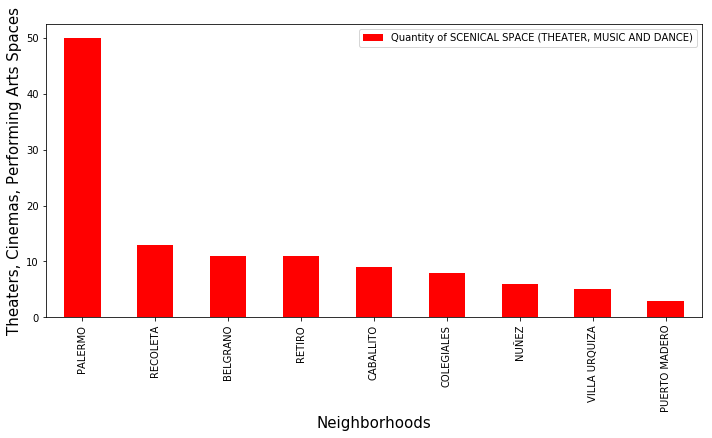

In [63]:
ax = tv_theaters.plot(kind='bar', x='Neighborhood', y='Count', figsize=(10,6), color='Red')
ax.legend(["Quantity of SCENICAL SPACE (THEATER, MUSIC AND DANCE)", "TV", "AUDIOVISUAL PRODUCTION in each Neighborhood"]);
fig = ax.get_figure()
ax.set_ylabel("Theaters, Cinemas, Performing Arts Spaces",fontsize = 15)
ax.set_xlabel("Neighborhoods",fontsize = 15)
fig.tight_layout()
fig.savefig("tv.png")

Palermo is by far the neighborhood that has more in this category.
Now we are going to look for Art Galleries, Cultural Centers and Museums to see where they are.

In [65]:
cat = ["ART GALLERY", "CULTURAL CENTER", "MUSEUM", "SALA DE EXPOSICION"]
galleries = df_cult[df_cult['Category'].isin(cat)]
galleries = galleries[galleries['Neighborhood'].isin(neighborhoods)]
galleries.rename(columns={'Category': 'Count'}, inplace=True)
galleries = galleries.groupby('Neighborhood', as_index=False).count().sort_values('Count', ascending=False)
galleries

Neighborhood  Name  Count  LAT  LNG
8         RETIRO    40     40   40   40
7       RECOLETA    35     35   35   35
5        PALERMO    33     33   33   33
1      CABALLITO     9      9    9    9
0       BELGRANO     8      8    8    8
6  PUERTO MADERO     7      7    7    7
4          NUÑEZ     4      4    4    4
9  VILLA URQUIZA     4      4    4    4
2        COGHLAN     1      1    1    1
3     COLEGIALES     1      1    1    1

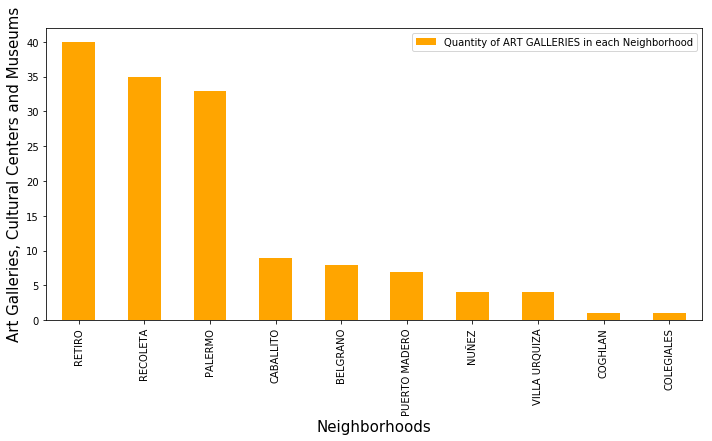

In [67]:
ax = galleries.plot(kind='bar', x='Neighborhood', y='Count', figsize=(10,6), color='Orange')
ax.legend(["Quantity of ART GALLERIES in each Neighborhood"]);
fig = ax.get_figure()
ax.set_ylabel("Art Galleries, Cultural Centers and Museums",fontsize = 15)
ax.set_xlabel("Neighborhoods",fontsize = 15)
fig.tight_layout()
fig.savefig("art.png")

Retiro, Recoleta and Palermo are by far the neighborhoods that have more in this category

Now we are going to look for Bars to see where they are

In [72]:
cat = ["BAR"]
bars = df_cult[df_cult['Category'].isin(cat)]
bars = bars[bars['Neighborhood'].isin(neighborhoods)]
bars.rename(columns={'Category': 'Count'}, inplace=True)
bars = bars.groupby('Neighborhood', as_index=False).count().sort_values('Count', ascending=False)
bars

Neighborhood  Name  Count  LAT  LNG
5        PALERMO     8      8    8    8
6       RECOLETA     8      8    8    8
1      CABALLITO     5      5    5    5
7         RETIRO     5      5    5    5
8  VILLA URQUIZA     5      5    5    5
0       BELGRANO     2      2    2    2
3     COLEGIALES     2      2    2    2
4          NUÑEZ     2      2    2    2
2        COGHLAN     1      1    1    1

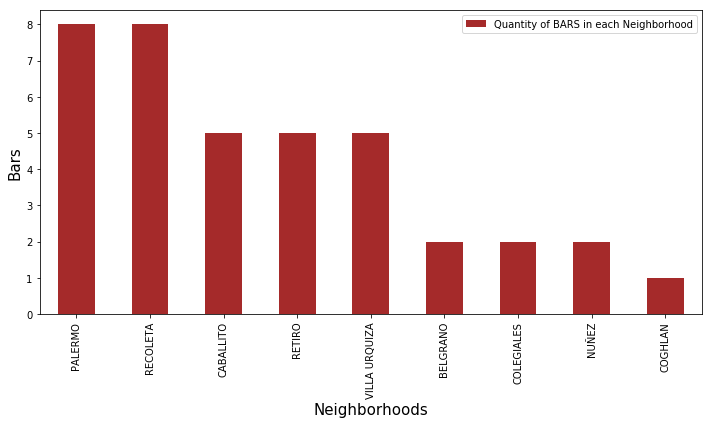

In [73]:
ax = bars.plot(kind='bar', x='Neighborhood', y='Count', figsize=(10,6), color='Brown')
ax.legend(["Quantity of BARS in each Neighborhood"]);
fig = ax.get_figure()
ax.set_ylabel("Bars",fontsize = 15)
ax.set_xlabel("Neighborhoods",fontsize = 15)
fig.tight_layout()
fig.savefig("art.png")

Recoleta and Palermo are the neighborhoods that have more in this category, but we are going to study this category in depth later.

##### Let's see the universities

In [68]:
#Get information of Universities in BA
url_uni = 'http://cdn.buenosaires.gob.ar/datosabiertos/datasets/universidades/universidades.csv'
df_uni = pd.read_csv(url_uni)
df_uni.head()

regimen                                         universida  univ_c  \
0  Privado  FLACSO (Facultad Latinoamericana de Ciencias S...       1   
1  Privado              Instituto Tecnológico de Buenos Aires       2   
2  Privado              Instituto Tecnológico de Buenos Aires       2   
3  Privado              Instituto Tecnológico de Buenos Aires       2   
4  Privado              Instituto Tecnológico de Buenos Aires       2   

                      unidad_aca  unac_c  anexo_c  unicue   cui  \
0                      Rectorado       1        0  100100  2546   
1                      Rectorado       1        0  200100  2456   
2  Departamento de Investigación       7        0  200700  2456   
3                Área de Energía      40        0  204000  2456   
4  Departamento de Bioingeniería      87        0  208700  2456   

                    telef        fax  ...          direccion_norm  \
0  5238-9339 (C)5238-9300  4375-1373  ...            Ayacucho 555   
1   63934813 [C]6393-4810  6393-4813  ...  Av. Eduardo Madero 399   
2               6393-4869  6393-4869  ...  Av. Eduardo Madero 399   
3               6393-4870  6393-4870  ...  Av. Eduardo Madero 399   
4               6393-4893  6393-4893  ...  Av. Eduardo Madero 399   

                 calle altura                                     WKT_gkba  \
0            Ayacucho     555  POINT (-58.3953412190814 -34.6026584750106)   
1  Av. Eduardo Madero     399  POINT (-58.3678488464698 -34.6031162314776)   
2  Av. Eduardo Madero     399  POINT (-58.3678488464698 -34.6031162314776)   
3  Av. Eduardo Madero     399  POINT (-58.3678488464698 -34.6031162314776)   
4  Av. Eduardo Madero     399  POINT (-58.3678488464698 -34.6031162314776)   

          barrio    comuna codigo_postal  codigo_postal_argentino       long  \
0      Balvanera  Comuna 3        1026.0                 C1026AAC -58.395341   
1  Puerto Madero  Comuna 1        1106.0                 C1106ACD -58.367849   
2  Puerto Madero  Comuna 1        1106.0                 C1106ACD -58.367849   
3  Puerto Madero  Comuna 1        1106.0                 C1106ACD -58.367849   
4  Puerto Madero  Comuna 1        1106.0                 C1106ACD -58.367849   

         lat  
0 -34.602658  
1 -34.603116  
2 -34.603116  
3 -34.603116  
4 -34.603116  

[5 rows x 21 columns]

Data wrangling

In [69]:
df_uni = df_uni[['barrio','universida', 'lat','long']]
df_uni.rename(columns={"universida": "Name", "barrio": "Neighborhood"}, inplace=True)
df_uni["Neighborhood"] = df_uni["Neighborhood"].str.upper()
df_uni

Neighborhood                                               Name  \
0        BALVANERA  FLACSO (Facultad Latinoamericana de Ciencias S...   
1    PUERTO MADERO              Instituto Tecnológico de Buenos Aires   
2    PUERTO MADERO              Instituto Tecnológico de Buenos Aires   
3    PUERTO MADERO              Instituto Tecnológico de Buenos Aires   
4    PUERTO MADERO              Instituto Tecnológico de Buenos Aires   
5    PUERTO MADERO              Instituto Tecnológico de Buenos Aires   
6    PUERTO MADERO              Instituto Tecnológico de Buenos Aires   
7    PUERTO MADERO              Instituto Tecnológico de Buenos Aires   
8    PUERTO MADERO              Instituto Tecnológico de Buenos Aires   
9    PUERTO MADERO              Instituto Tecnológico de Buenos Aires   
10   PUERTO MADERO              Instituto Tecnológico de Buenos Aires   
11   PUERTO MADERO              Instituto Tecnológico de Buenos Aires   
12   PUERTO MADERO              Instituto Tecnológico de Buenos Aires   
13   PUERTO MADERO              Instituto Tecnológico de Buenos Aires   
14   PUERTO MADERO              Instituto Tecnológico de Buenos Aires   
15   PUERTO MADERO              Instituto Tecnológico de Buenos Aires   
16   PUERTO MADERO              Instituto Tecnológico de Buenos Aires   
17   PUERTO MADERO              Instituto Tecnológico de Buenos Aires   
18   PUERTO MADERO              Instituto Tecnológico de Buenos Aires   
19   PUERTO MADERO              Instituto Tecnológico de Buenos Aires   
20   PUERTO MADERO              Instituto Tecnológico de Buenos Aires   
21   PUERTO MADERO              Instituto Tecnológico de Buenos Aires   
22   PUERTO MADERO              Instituto Tecnológico de Buenos Aires   
23   PUERTO MADERO              Instituto Tecnológico de Buenos Aires   
24   PUERTO MADERO              Instituto Tecnológico de Buenos Aires   
25         PALERMO                Instituto Universitario Aeronáutico   
26         PALERMO                Instituto Universitario Aeronáutico   
27     SAN NICOLAS                Instituto Universitario Aeronáutico   
28        SAAVEDRA                      Instituto Universitario CEMIC   
29        SAAVEDRA                      Instituto Universitario CEMIC   
..             ...                                                ...   
363        ALMAGRO                  Universidad Nacional de las Artes   
364         RETIRO                  Universidad Nacional de las Artes   
365        PALERMO                  Universidad Nacional de las Artes   
366        ALMAGRO                  Universidad Nacional de las Artes   
367        ALMAGRO                  Universidad Nacional de las Artes   
368       RECOLETA                  Universidad Nacional de las Artes   
369      BALVANERA                  Universidad Nacional de las Artes   
370         RETIRO                  Universidad Nacional de las Artes   
371      BALVANERA                      Universidad Nacional de Luján   
372   CONSTITUCION                    Universidad Nacional de Quilmes   
373       BELGRANO                 Universidad Nacional de San Martín   
374       BARRACAS                 Universidad Nacional de San Martín   
375    SAN NICOLAS            Universidad Nacional de Tres de Febrero   
376       RECOLETA  Universidad Pedagógica de la Provincia de Buen...   
377    SAN NICOLAS                   Universidad Tecnológica Nacional   
378        ALMAGRO                   Universidad Tecnológica Nacional   
379  VILLA ORTUZAR                   Universidad Tecnológica Nacional   
380   VILLA LUGANO                   Universidad Tecnológica Nacional   
381        ALMAGRO                   Universidad Tecnológica Nacional   
382       BELGRANO                      Universidad Torcuato Di Tella   
383       BELGRANO                      Universidad Torcuato Di Tella   
384       BELGRANO                      Universidad Torcuato Di Tella   
385       BELGRANO                      Universidad Torcuato Di 

In [70]:
df_uni.rename(columns={"Name": "count"}, inplace=True)
df_uni = df_uni[df_uni['Neighborhood'].isin(neighborhoods)]
df_uni = df_uni.groupby(['Neighborhood'], as_index=False).count().sort_values('count',ascending=False)

df_uni

Neighborhood  count  lat  long
4  PUERTO MADERO     39   39    39
3        PALERMO     31   31    31
5       RECOLETA     27   27    27
1      CABALLITO     25   25    25
6         RETIRO     24   24    24
0       BELGRANO     18   18    18
7  VILLA URQUIZA      2    2     2
2     COLEGIALES      1    1     1

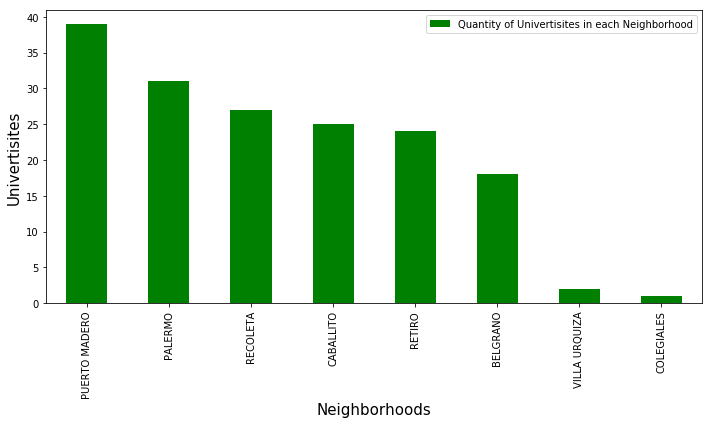

In [71]:
ax = df_uni.plot(kind='bar', x='Neighborhood', y='count', figsize=(10,6), color='Green')
ax.legend(["Quantity of Univertisites in each Neighborhood"]);
fig = ax.get_figure()
ax.set_ylabel("Univertisites",fontsize = 15)
ax.set_xlabel("Neighborhoods",fontsize = 15)
fig.tight_layout()
fig.savefig("uni.png")

Puerto Madero is the neighborhood that has more universities, followed by Palermo

##### Now we are going to use the Foursquare Api to analyze about the category of the place that we are going to open: Craft Beer Bar.

API Setup

In [74]:
#Foursquare API config
CLIENT_ID = 'WA2HXEISYX4TANJBMIIHFPVSXBQ3PVX2FWY0UUODJB42AAES' # your Foursquare ID
CLIENT_SECRET = 'JGE4FSINLP0PCG5OONSBMCLBXX3WUOUFOQLSZRVTGEHHJHDR' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WA2HXEISYX4TANJBMIIHFPVSXBQ3PVX2FWY0UUODJB42AAES
CLIENT_SECRET:JGE4FSINLP0PCG5OONSBMCLBXX3WUOUFOQLSZRVTGEHHJHDR


Define a function to obtain the information of the venues, with a limit of 500 and a radius of 5000 meters

In [75]:
def get_venues(name, latitudes, longitudes, radius=5000):
    LIMIT = 500
    venues_list=[]
    for name, lat, lng in zip(name, latitudes, longitudes):
        print("Retrieving venues of",name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        #Information for each venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['id'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue','id',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(venues)

Let's see the venues of each of our candidate neighborhoods and save the information in a csv file

In [76]:
ba_venues = get_venues(name=top_ten['Neighborhood'],
                                   latitudes=top_ten['lat'],
                                   longitudes=top_ten['lon']
                                  )
ba_venues.to_csv("ba_venues.csv")

Retrieving venues of PUERTO MADERO
Retrieving venues of RECOLETA
Retrieving venues of PALERMO
Retrieving venues of BELGRANO
Retrieving venues of NUÑEZ
Retrieving venues of COLEGIALES
Retrieving venues of VILLA URQUIZA
Retrieving venues of COGHLAN
Retrieving venues of RETIRO
Retrieving venues of CABALLITO


In [77]:
ba_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue   id  \
Neighborhood                                                               
BELGRANO                         100                     100    100  100   
CABALLITO                        100                     100    100  100   
COGHLAN                          100                     100    100  100   
COLEGIALES                       100                     100    100  100   
NUÑEZ                            100                     100    100  100   
PALERMO                          100                     100    100  100   
PUERTO MADERO                    100                     100    100  100   
RECOLETA                         100                     100    100  100   
RETIRO                           100                     100    100  100   
VILLA URQUIZA                    100                     100    100  100   

               Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                    
BELGRANO                  100              100             100  
CABALLITO                 100              100             100  
COGHLAN                   100              100             100  
COLEGIALES                100              100             100  
NUÑEZ                     100              100             100  
PALERMO                   100              100             100  
PUERTO MADERO             100              100             100  
RECOLETA                  100              100             100  
RETIRO                    100              100             100  
VILLA URQUIZA             100              100             100

Let's see how many of these venues are Beer Bars, the category in which we are interested in opening one venue

In [82]:
beer_bar = ba_venues[ba_venues['Venue Category'] == 'Beer Bar']
beer_bar

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
58   PUERTO MADERO             -34.610376              -58.362207   
172       RECOLETA             -34.587358              -58.391570   
251        PALERMO             -34.580336              -58.424524   
257        PALERMO             -34.580336              -58.424524   
258        PALERMO             -34.580336              -58.424524   
495          NUÑEZ             -34.545348              -58.462149   
990      CABALLITO             -34.620077              -58.442489   

            Venue                        id  Venue Latitude  Venue Longitude  \
58   Temple Craft  5c392276c0c08400259fef36      -34.607542       -58.366274   
172          PIBÄ  57895de8498e06629c952f1b      -34.578956       -58.412735   
251   Desarmadero  593353460531e831641a689b      -34.594165       -58.424196   
257          PIBÄ  57895de8498e06629c952f1b      -34.578956       -58.412735   
258  Temple Craft  589cf82644587f417fcebce9      -34.588016       -58.427114   
495      Cervelar  564d1e80498e236ed12c1afe      -34.558706       -58.457955   
990  Temple Craft  589cf82644587f417fcebce9      -34.588016       -58.427114   

    Venue Category  
58        Beer Bar  
172       Beer Bar  
251       Beer Bar  
257       Beer Bar  
258       Beer Bar  
495       Beer Bar  
990       Beer Bar

In [84]:
beer_bar = beer_bar.groupby('Neighborhood', as_index=False).count()
beer_bar

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  Venue  id  \
0      CABALLITO                      1                       1      1   1   
1          NUÑEZ                      1                       1      1   1   
2        PALERMO                      3                       3      3   3   
3  PUERTO MADERO                      1                       1      1   1   
4       RECOLETA                      1                       1      1   1   

   Venue Latitude  Venue Longitude  Venue Category  
0               1                1               1  
1               1                1               1  
2               3                3               3  
3               1                1               1  
4               1                1               1

Count Beer Bars by Neighborhood

In [85]:
beer_bar.rename(columns={'Neighborhood Latitude': 'lat','Neighborhood Longitude': 'long'}, inplace=True)
beer_bar.rename(columns={"Venue Category": "Count"}, inplace=True)
beer_bar = beer_bar.sort_values("Count", ascending=False)
beer_bar

Neighborhood  lat  long  Venue  id  Venue Latitude  Venue Longitude  Count
2        PALERMO    3     3      3   3               3                3      3
0      CABALLITO    1     1      1   1               1                1      1
1          NUÑEZ    1     1      1   1               1                1      1
3  PUERTO MADERO    1     1      1   1               1                1      1
4       RECOLETA    1     1      1   1               1                1      1

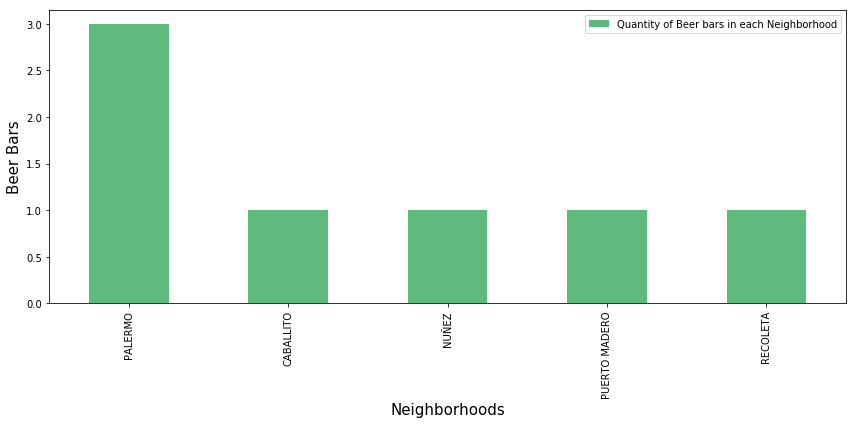

In [86]:
ax = beer_bar.plot(kind='bar', x='Neighborhood', y='Count', figsize=(12,6), color='#5EBA7D')
ax.legend(["Quantity of Beer bars in each Neighborhood"]);
fig = ax.get_figure()
ax.set_ylabel("Beer Bars",fontsize = 15)
ax.set_xlabel("Neighborhoods",fontsize = 15)
fig.tight_layout()
fig.savefig("beer_bar.png")

Let's see on a map choropleth the quantity of Beer Bars in Buenos Aires

In [88]:
beer_map = folium.Map(location=[ba_center[0], ba_center[1]], zoom_start=12)

beer_map.choropleth(
    geo_data=caba_geo,
    data=beer_bar,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.barrio',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name="Beer bars per Neigborhood"
)
# display map
beer_map.save('beer_map.html')
beer_map

In [89]:
shops = ba_venues[ba_venues['Venue Category'] == 'Beer Bar']
shops

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
58   PUERTO MADERO             -34.610376              -58.362207   
172       RECOLETA             -34.587358              -58.391570   
251        PALERMO             -34.580336              -58.424524   
257        PALERMO             -34.580336              -58.424524   
258        PALERMO             -34.580336              -58.424524   
495          NUÑEZ             -34.545348              -58.462149   
990      CABALLITO             -34.620077              -58.442489   

            Venue                        id  Venue Latitude  Venue Longitude  \
58   Temple Craft  5c392276c0c08400259fef36      -34.607542       -58.366274   
172          PIBÄ  57895de8498e06629c952f1b      -34.578956       -58.412735   
251   Desarmadero  593353460531e831641a689b      -34.594165       -58.424196   
257          PIBÄ  57895de8498e06629c952f1b      -34.578956       -58.412735   
258  Temple Craft  589cf82644587f417fcebce9      -34.588016       -58.427114   
495      Cervelar  564d1e80498e236ed12c1afe      -34.558706       -58.457955   
990  Temple Craft  589cf82644587f417fcebce9      -34.588016       -58.427114   

    Venue Category  
58        Beer Bar  
172       Beer Bar  
251       Beer Bar  
257       Beer Bar  
258       Beer Bar  
495       Beer Bar  
990       Beer Bar

##### We will merge and place all the data in a single dataframe to have all the unified information in one place

In [90]:
res = pd.merge(top_ten,tv_theaters, on='Neighborhood', how='outer')
res.drop(columns=["Name", "LAT", "LNG"], inplace=True)
res.rename(columns={"Count": "TV-Studios"}, inplace=True)
res

Neighborhood        lat        lon    avg_price  TV-Studios
0  PUERTO MADERO -34.610376 -58.362207  6030.571429         3.0
1       RECOLETA -34.587358 -58.391570  3751.450000        13.0
2        PALERMO -34.580336 -58.424524  3708.200000        50.0
3       BELGRANO -34.561308 -58.456545  3637.375000        11.0
4          NUÑEZ -34.545348 -58.462149  3515.777778         6.0
5     COLEGIALES -34.574515 -58.452282  3302.294118         8.0
6  VILLA URQUIZA -34.573241 -58.491478  3127.575000         5.0
7        COGHLAN -34.559910 -58.474714  3091.352941         NaN
8         RETIRO -34.591643 -58.373307  3010.300000        11.0
9      CABALLITO -34.620077 -58.442489  2925.300000         9.0

In [91]:
res = pd.merge(res,galleries, on='Neighborhood', how='outer')
res.drop(columns=["Name", "LAT", "LNG"], inplace=True)
res.rename(columns={"Count": "Galleries"}, inplace=True)
res

Neighborhood        lat        lon    avg_price  TV-Studios  Galleries
0  PUERTO MADERO -34.610376 -58.362207  6030.571429         3.0          7
1       RECOLETA -34.587358 -58.391570  3751.450000        13.0         35
2        PALERMO -34.580336 -58.424524  3708.200000        50.0         33
3       BELGRANO -34.561308 -58.456545  3637.375000        11.0          8
4          NUÑEZ -34.545348 -58.462149  3515.777778         6.0          4
5     COLEGIALES -34.574515 -58.452282  3302.294118         8.0          1
6  VILLA URQUIZA -34.573241 -58.491478  3127.575000         5.0          4
7        COGHLAN -34.559910 -58.474714  3091.352941         NaN          1
8         RETIRO -34.591643 -58.373307  3010.300000        11.0         40
9      CABALLITO -34.620077 -58.442489  2925.300000         9.0          9

In [92]:
res = pd.merge(res,bars, on='Neighborhood', how='outer')
res.drop(columns=["Name", "LAT", "LNG"], inplace=True)
res.rename(columns={"Count": "Bars"}, inplace=True)
res

Neighborhood        lat        lon    avg_price  TV-Studios  Galleries  \
0  PUERTO MADERO -34.610376 -58.362207  6030.571429         3.0          7   
1       RECOLETA -34.587358 -58.391570  3751.450000        13.0         35   
2        PALERMO -34.580336 -58.424524  3708.200000        50.0         33   
3       BELGRANO -34.561308 -58.456545  3637.375000        11.0          8   
4          NUÑEZ -34.545348 -58.462149  3515.777778         6.0          4   
5     COLEGIALES -34.574515 -58.452282  3302.294118         8.0          1   
6  VILLA URQUIZA -34.573241 -58.491478  3127.575000         5.0          4   
7        COGHLAN -34.559910 -58.474714  3091.352941         NaN          1   
8         RETIRO -34.591643 -58.373307  3010.300000        11.0         40   
9      CABALLITO -34.620077 -58.442489  2925.300000         9.0          9   

   Bars  
0   NaN  
1   8.0  
2   8.0  
3   2.0  
4   2.0  
5   2.0  
6   5.0  
7   1.0  
8   5.0  
9   5.0

In [93]:
res = pd.merge(res,df_uni, on='Neighborhood', how='outer')
res.rename(columns={"count": "Univerisites", "lat_x": "lat" }, inplace=True)
res.drop(columns=['lat_y','long'], inplace=True)
res.replace(np.nan, 0, inplace=True)
res

Neighborhood        lat        lon    avg_price  TV-Studios  Galleries  \
0  PUERTO MADERO -34.610376 -58.362207  6030.571429         3.0          7   
1       RECOLETA -34.587358 -58.391570  3751.450000        13.0         35   
2        PALERMO -34.580336 -58.424524  3708.200000        50.0         33   
3       BELGRANO -34.561308 -58.456545  3637.375000        11.0          8   
4          NUÑEZ -34.545348 -58.462149  3515.777778         6.0          4   
5     COLEGIALES -34.574515 -58.452282  3302.294118         8.0          1   
6  VILLA URQUIZA -34.573241 -58.491478  3127.575000         5.0          4   
7        COGHLAN -34.559910 -58.474714  3091.352941         0.0          1   
8         RETIRO -34.591643 -58.373307  3010.300000        11.0         40   
9      CABALLITO -34.620077 -58.442489  2925.300000         9.0          9   

   Bars  Univerisites  
0   0.0          39.0  
1   8.0          27.0  
2   8.0          31.0  
3   2.0          18.0  
4   2.0           0.0  
5   2.0           1.0  
6   5.0           2.0  
7   1.0           0.0  
8   5.0          24.0  
9   5.0          25.0

In [94]:
res = pd.merge(res,beer_bar, on='Neighborhood', how='outer')
res.rename(columns={"Count": "Beer-Bars", "lat_x": "lat"}, inplace=True)
res.drop(columns=["lat_y","long","Venue","id","Venue Latitude","Venue Longitude"], inplace=True)
res

Neighborhood        lat        lon    avg_price  TV-Studios  Galleries  \
0  PUERTO MADERO -34.610376 -58.362207  6030.571429         3.0          7   
1       RECOLETA -34.587358 -58.391570  3751.450000        13.0         35   
2        PALERMO -34.580336 -58.424524  3708.200000        50.0         33   
3       BELGRANO -34.561308 -58.456545  3637.375000        11.0          8   
4          NUÑEZ -34.545348 -58.462149  3515.777778         6.0          4   
5     COLEGIALES -34.574515 -58.452282  3302.294118         8.0          1   
6  VILLA URQUIZA -34.573241 -58.491478  3127.575000         5.0          4   
7        COGHLAN -34.559910 -58.474714  3091.352941         0.0          1   
8         RETIRO -34.591643 -58.373307  3010.300000        11.0         40   
9      CABALLITO -34.620077 -58.442489  2925.300000         9.0          9   

   Bars  Univerisites  Beer-Bars  
0   0.0          39.0        1.0  
1   8.0          27.0        1.0  
2   8.0          31.0        3.0  
3   2.0          18.0        NaN  
4   2.0           0.0        1.0  
5   2.0           1.0        NaN  
6   5.0           2.0        NaN  
7   1.0           0.0        NaN  
8   5.0          24.0        NaN  
9   5.0          25.0        1.0

In [95]:
res.replace(np.nan, 0, inplace=True)
res

Neighborhood        lat        lon    avg_price  TV-Studios  Galleries  \
0  PUERTO MADERO -34.610376 -58.362207  6030.571429         3.0          7   
1       RECOLETA -34.587358 -58.391570  3751.450000        13.0         35   
2        PALERMO -34.580336 -58.424524  3708.200000        50.0         33   
3       BELGRANO -34.561308 -58.456545  3637.375000        11.0          8   
4          NUÑEZ -34.545348 -58.462149  3515.777778         6.0          4   
5     COLEGIALES -34.574515 -58.452282  3302.294118         8.0          1   
6  VILLA URQUIZA -34.573241 -58.491478  3127.575000         5.0          4   
7        COGHLAN -34.559910 -58.474714  3091.352941         0.0          1   
8         RETIRO -34.591643 -58.373307  3010.300000        11.0         40   
9      CABALLITO -34.620077 -58.442489  2925.300000         9.0          9   

   Bars  Univerisites  Beer-Bars  
0   0.0          39.0        1.0  
1   8.0          27.0        1.0  
2   8.0          31.0        3.0  
3   2.0          18.0        0.0  
4   2.0           0.0        1.0  
5   2.0           1.0        0.0  
6   5.0           2.0        0.0  
7   1.0           0.0        0.0  
8   5.0          24.0        0.0  
9   5.0          25.0        1.0

Import the libraries needed to graph

In [96]:
import seaborn as sns
import numpy as np
from sklearn import preprocessing

Define the features to represent in the graph and define a function to make Radar Graph with all the features of each Neighborhood

In [97]:
features=np.array(['TV-Studios','Galleries','Bars','Univerisites','Beer-Bars'] )

def make_radar(df):
    i = 0
    for i in range(len(df)):
        stats=df.loc[i,features].values
        name = df.loc[i].Neighborhood
        angles=np.linspace(0, 2*np.pi, len(features), endpoint=False)# Set the angle
        stats=np.concatenate((stats,[stats[0]])) 
        angles=np.concatenate((angles,[angles[0]])) 
        fig=plt.figure()
        ax = fig.add_subplot(111, polar=True)   # Set polar axis
        ax.plot(angles, stats, 'o-', linewidth=2)  # Draw the plot (or the frame on the radar chart)
        ax.fill(angles, stats, alpha=0.25)  #Fulfill the area
        ax.set_thetagrids(angles * 180/np.pi, features)  # Set the label for each axis
        ax.set_title(df.loc[i].Neighborhood)  
        ax.grid(True)
        file = name +".png"
        fig.savefig(file)
        i = i +1

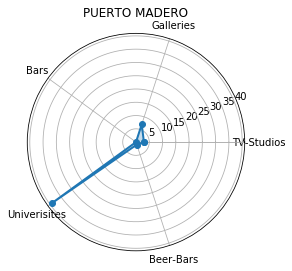

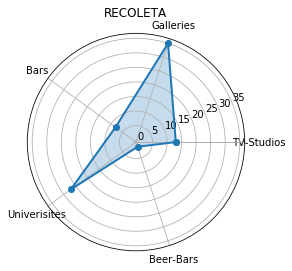

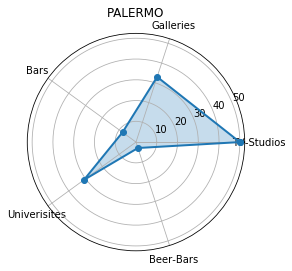

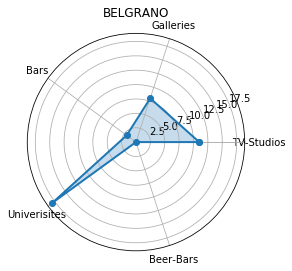

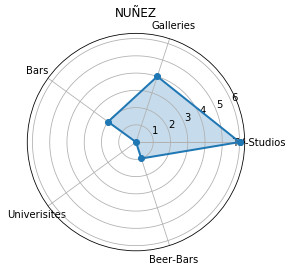

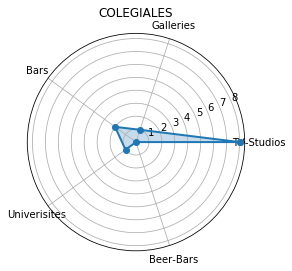

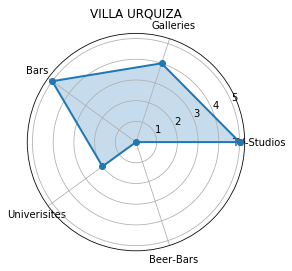

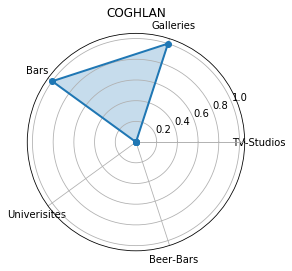

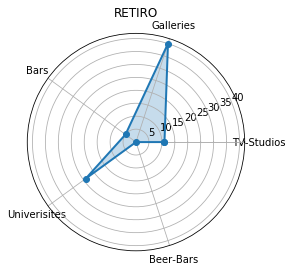

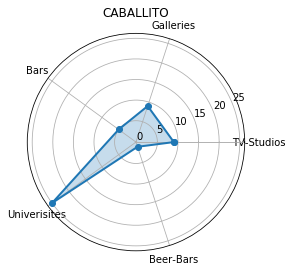

In [98]:
make_radar(res)

Define a function to get the details of each venue in Foursquare

In [99]:
def get_venue_details(id):

    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [100]:
columns_names=['Neighborhood', 'ID','Name','Rating','Likes','Tips']
craft_beer_bars=pd.DataFrame(columns=columns_names)


for neighborhood, Id, name in zip(shops.Neighborhood, shops.id, shops.Venue):
    try:
        details = get_venue_details(Id)
        #print(details)
        Id,name,likes,rating,tips=details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',Id)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        Id,name,likes,rating,tips=[0]*5
    #print('(',count,'/',len(indian_rest_ny),')','processed')
    craft_beer_bars= craft_beer_bars.append({
                                                'Neighborhood': neighborhood, 
                                                'ID': Id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)

In [101]:
craft_beer_bars.to_csv('craft_beer_bars_details.csv')
craft_beer_bars

Neighborhood                        ID          Name  Rating Likes Tips
0  PUERTO MADERO  5c392276c0c08400259fef36  Temple Craft     7.9     8    2
1       RECOLETA  57895de8498e06629c952f1b          PIBÄ     8.2    71   17
2        PALERMO  593353460531e831641a689b   Desarmadero     8.6   126   38
3        PALERMO  57895de8498e06629c952f1b          PIBÄ     8.2    71   17
4        PALERMO  589cf82644587f417fcebce9  Temple Craft     8.1    87   12
5          NUÑEZ  564d1e80498e236ed12c1afe      Cervelar     7.7   205   55
6      CABALLITO  589cf82644587f417fcebce9  Temple Craft     8.1    87   12

Convert the values into integers to be able to perform statistics

In [102]:
craft_beer_bars["Likes"] = craft_beer_bars["Likes"].astype(str).astype(int)
craft_beer_bars["Tips"] = craft_beer_bars["Tips"].astype(str).astype(int)
craft_beer_bars

Neighborhood                        ID          Name  Rating  Likes  Tips
0  PUERTO MADERO  5c392276c0c08400259fef36  Temple Craft     7.9      8     2
1       RECOLETA  57895de8498e06629c952f1b          PIBÄ     8.2     71    17
2        PALERMO  593353460531e831641a689b   Desarmadero     8.6    126    38
3        PALERMO  57895de8498e06629c952f1b          PIBÄ     8.2     71    17
4        PALERMO  589cf82644587f417fcebce9  Temple Craft     8.1     87    12
5          NUÑEZ  564d1e80498e236ed12c1afe      Cervelar     7.7    205    55
6      CABALLITO  589cf82644587f417fcebce9  Temple Craft     8.1     87    12

We will count how many Beer Bars there are per neighborhood and calculate the Average Rating, Likes and Tips of each

In [103]:
stats = craft_beer_bars.groupby(["Neighborhood"], as_index=False).agg({'Rating' : 'mean', "Likes" : 'mean', "Tips": "mean", 'Name' : 'count'})
stats.rename(columns={"Rating": "AVG Rating","Likes": "AVG Likes","Tips": "AVG Tips","Name":"Count"}, inplace=True)
stats.sort_values("AVG Rating")

Neighborhood  AVG Rating   AVG Likes   AVG Tips  Count
1          NUÑEZ         7.7  205.000000  55.000000      1
3  PUERTO MADERO         7.9    8.000000   2.000000      1
0      CABALLITO         8.1   87.000000  12.000000      1
4       RECOLETA         8.2   71.000000  17.000000      1
2        PALERMO         8.3   94.666667  22.333333      3

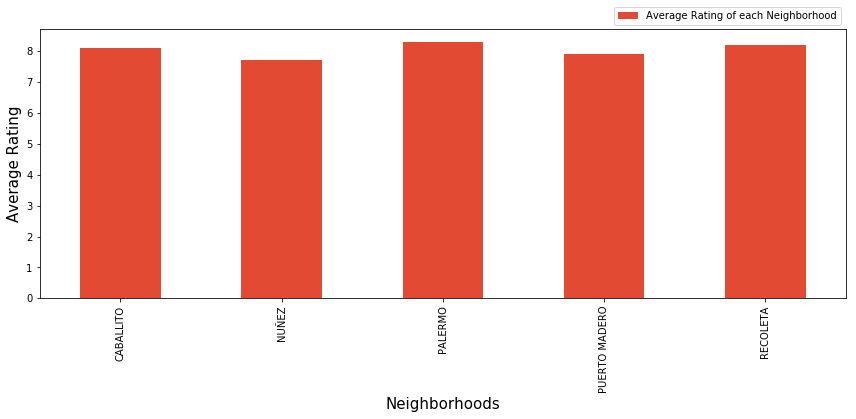

In [104]:
ax = stats.plot(kind='bar', x='Neighborhood', y='AVG Rating', figsize=(12,6), color='#E24A33')
ax.legend(["Average Rating of each Neighborhood"],bbox_to_anchor=(1, 1.1));
fig = ax.get_figure()
ax.set_ylabel("Average Rating",fontsize = 15)
ax.set_xlabel("Neighborhoods",fontsize = 15)
fig.tight_layout()
fig.savefig("stats.png")

As we see, Rating averages are very similar between neighborhoods. We can see that Caballito and Recoleta are the neighborhoods that have the highest average with only one Beer Bar. Palermo is the one with the most Beer Bars.

Let's see this on a map

In [105]:
rating_map = folium.Map(location=[ba_center[0], ba_center[1]], zoom_start=12)
rating_map.choropleth(
    geo_data=caba_geo,
    data=stats,
    columns=['Neighborhood', 'AVG Rating'],
    key_on='feature.properties.barrio',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name="Average Rating per Neigborhood"
)

# display map
rating_map.save('rating_map.html')
rating_map

Now let's see the amount of Coffee Shops in each Neighborhood

In [106]:
count_map = folium.Map(location=[ba_center[0], ba_center[1]], zoom_start=12)
count_map.choropleth(
    geo_data=caba_geo,
    data=stats,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.barrio',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name="Quantity of Coffee Shops per Neigborhood"
)

# display map
count_map.save('count_map.html')
count_map

Discuss
We discovered that Puerto Madero, Recoleta and Palermo are the most expensive neighborhoods to live, and so they are also the ones with more coffee shops. Caballito is the cheapest neighborhood and also the one with few coffee shops.

Palermo, Retiro and Recoleta are the neighborhoods with more cultural activity. Puerto Madero is where there are more universities. In the middle is Caballito with an acceptable amount of Universities and Cultural Activities.

Puerto Madero and Retiro are the neighborhood with more coffee shops, but the customer's rating isn’t the best.

Caballito is the best ranked on Coffee Shops Rating, Nuñez is the neighborhood with the worst rating.

Conclusions
Based on the results described above, we find we can conclude that:
Caballito has the potential to open a Starbucks. It’s the neighborhood where there are fewer Coffee Shops and the average price of m2 is the lowest. It also has a significant number of Universities, Theaters, Cinemas, Cultural Centers which make the neighborhood a meeting point for many people and make this neighborhood the best candidate due to the low price and the low exploitation of the market.